<a href="https://colab.research.google.com/github/YogenderSingh07/ibm-ml-learning/blob/main/understanding_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

In [ ]:
# Logistic regression is used for classification (like linear regression is used for predicting continuous vals)

# metrics to determine the accuracy -- precision,recall,f1 score( precison,recall are derived from confusion matrix)
#f1 score is harmonic mean of precision and recall

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Heart_Disease_Prediction.csv')
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
def convert(a):
  if a =="Presence":
    return 1
  else:
    return 0

data['Heart Disease'] = data['Heart Disease'].apply(convert)
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
x=data.drop('Heart Disease',axis=1)
y = data['Heart Disease']
x.shape,y.shape

((270, 13), (270,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=31)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape,x_test.shape

((216, 13), (54, 13))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict = lr.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
lr.score(x_test,y_test)

0.9444444444444444

for single feature


In [ ]:
x2=data[['ST depression']]
y2 = data['Heart Disease']

In [ ]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.20,random_state=56)
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((216, 1), (54, 1), (216,), (54,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_train = sc.fit_transform(x2_train)
x2_test = sc.transform(x2_test)
x2_train.shape,x2_test.shape

((216, 1), (54, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x2_train,y2_train)

LogisticRegression()

In [ ]:
y_predict = lr.predict(x2_test)
y_predict

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
lr.score(x2_test,y2_test)

0.6666666666666666

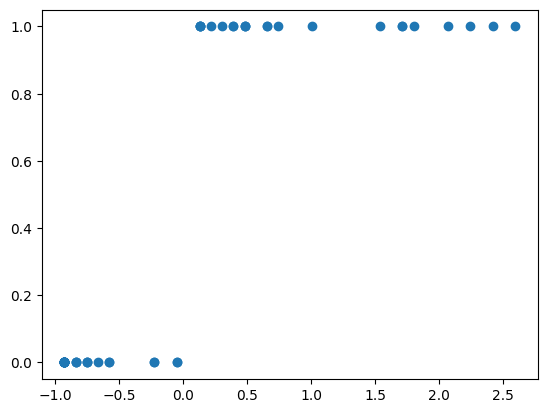

In [ ]:
plt.scatter(x2_test,lr.predict(x2_test))

<Axes: xlabel='Heart Disease', ylabel='Age'>

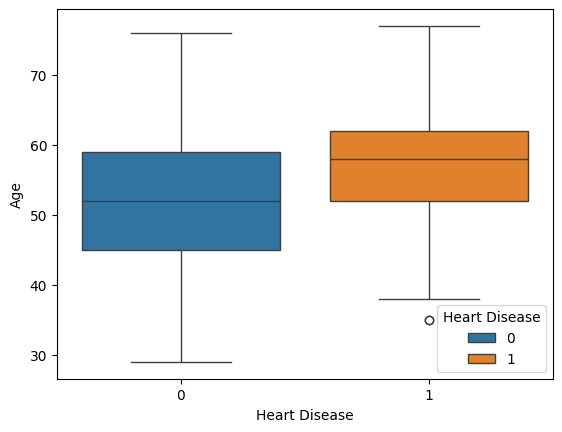

In [ ]:
sns.boxplot(x='Heart Disease',y='Age',data=data,hue='Heart Disease')

<Axes: xlabel='Heart Disease', ylabel='ST depression'>

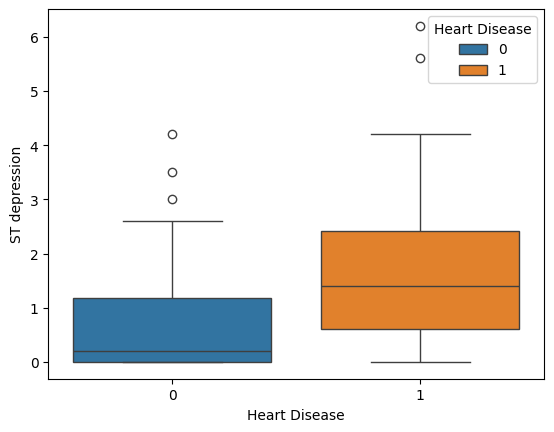

In [ ]:
sns.boxplot(x='Heart Disease',y='ST depression',data=data,hue='Heart Disease')